What is the best neighborhood in Pittsburgh?


In [15]:
#Use crime statisitics to first find the world neighborhoods consistenlty across the board then find the neighborhoods that experince the least crime (of course we assume per capita of that area)
import pandas as pd

import numpy as np

import matplotlib.pyplot as plt





#Least Crime
#Highest rate of Employment 
#Enviroment Quality

crime = pd.read_csv('pghcrime2024.csv', dtype={17: str})


# Remove NAN
crime = crime['Neighborhood'].unique()

print(crime)

['Brookline' 'Manchester' 'Point Breeze North' 'South Side Flats'
 'North Shore' 'Greenfield' 'Homewood North' 'South Side Slopes'
 'Central Business District' nan 'East Liberty' 'North Oakland'
 'Squirrel Hill South' 'East Allegheny' 'Strip District'
 'Lincoln–Lemington–Belmar' 'Shadyside' 'Carrick' 'Point Breeze'
 'Morningside' 'Allentown' 'Crafton Heights' 'Mount Washington'
 'Crawford-Roberts' 'Marshall-Shadeland' 'Central Oakland' 'Elliott'
 'Brighton Heights' 'Central Lawrenceville' 'Summer Hill' 'South Oakland'
 'Homewood South' 'Knoxville' 'Terrace Village' 'West Oakland' 'Fineview'
 'Upper Lawrenceville' 'Sheraden' 'Spring Hill–City View' 'Bloomfield'
 'Beechview' 'Squirrel Hill North' 'Perry South' 'Garfield' 'Banksville'
 'Bluff' 'Bon Air' 'Northview Heights' 'Overbrook' 'Larimer' 'Hazelwood'
 'Friendship' 'Central Northside' 'Homewood West' 'Lower Lawrenceville'
 'East Carnegie' 'Bedford Dwellings' 'Lincoln-Lemington-Belmar'
 'New Homestead' 'Troy Hill' 'Highland Park' 'Lin

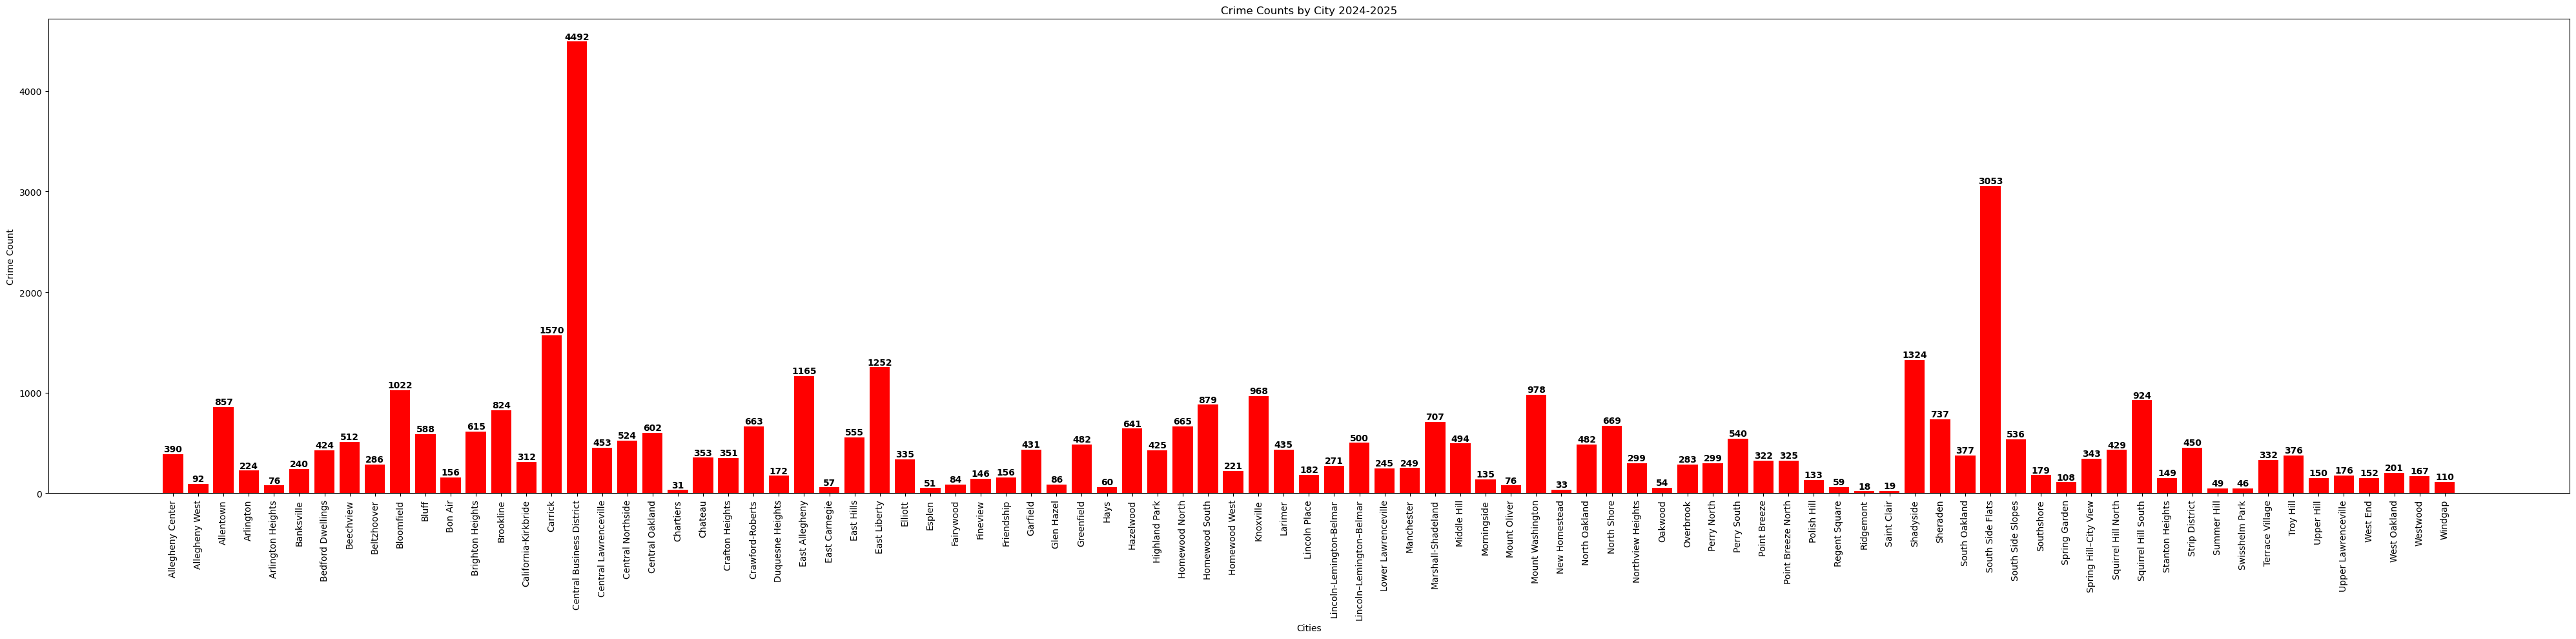

In [12]:
#Types of Crimes in pittsburgh excluding sex crimes 
import matplotlib.pyplot as plt
import pandas as pd

crime = pd.read_csv('pghcrime2024.csv', dtype={17: str})


# Remove NAN
crime = crime[crime['Neighborhood'].notna()]
crime['Neighborhood'] = crime['Neighborhood'].astype(str)  # Ensure city names are strings


cities = sorted(list(crime['Neighborhood'].unique())) #Indivusally sorted citites 


repeat_cities = crime['Neighborhood'].tolist() #repeated cities to keep track, each city name == +1 crime


crime_dict = {} #hash tabel to connect city name == +1 crime

# Counting the crimes per city
for city in repeat_cities:
    if city in crime_dict:
        crime_dict[city] += 1
    else:
        crime_dict[city] = 1


crime_counts = [crime_dict[city] for city in cities] #sorting cities according the counted number of crimes so its 1:1 when looking at both arrays 


plt.figure(figsize=(40, 10)) #bar graph
bars = plt.bar(cities, crime_counts, color='red') #x and y axis and color of bars 


plt.xticks(rotation=90) #rotates the names youll see at the borrom of the graph bevause otherwise it would just like horizontal jubled up words 


for bar in bars:
    yval = bar.get_height()  # Get the height of the bar (crime count)
    plt.text(bar.get_x() + bar.get_width() / 2, yval + 5,  # Position above the bar  ,, so basically bar.get_x() is the x coordinate for the indvual bar and the get_width/2 just gives the very venter of the bar and yval is just the coordinate of the text which is above the bar and im adding 5 so it doesnt really cover the bar itself but give cushinojng so it floats slgihlt above 
             str(yval), ha='center', va='bottom', color='black', fontweight='bold') #convert crime count nto string and now im just centering the text itself and changing the color/font no diffrent then using google docs 

# Labels and title
plt.xlabel('Cities')
plt.ylabel('Crime Count')
plt.title('Crime Counts by City 2024-2025')

# Show the plot
plt.tight_layout()  # Ensure the labels fit within the figure
plt.show()

The areas with obviously the most crime are 

**Central Business District**
**Southside Flats**
**Shadyside**

...and obviously a few others but we will dive into what crimes are in these areas and try to find any simillarties but first we will see what crimes in pittsburgh in general tend to be most commited 

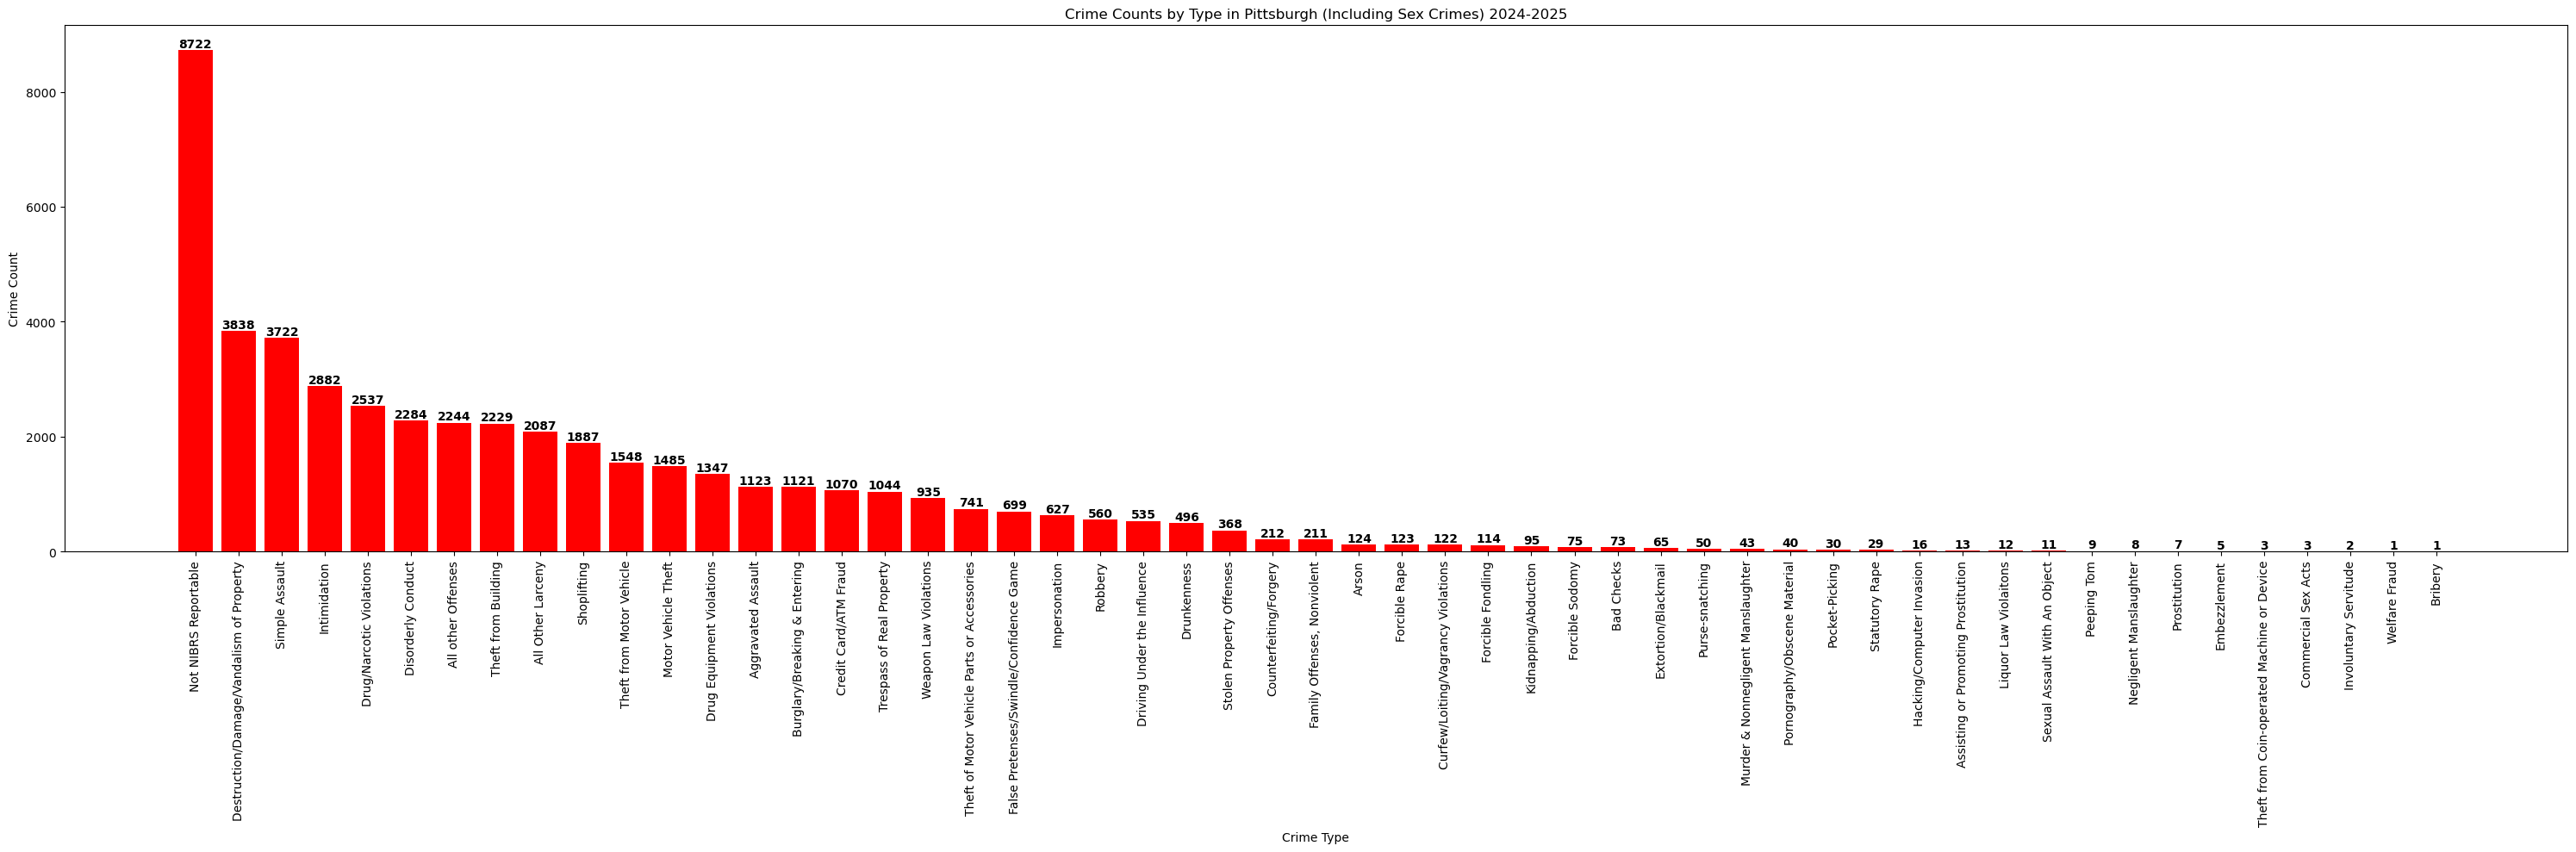

In [31]:
import matplotlib.pyplot as plt
import pandas as pd
from collections import Counter

crime = pd.read_csv('pghcrime2024.csv', dtype={17: str}) #load datasey

crime = crime[crime['NIBRS_Offense_Type'].notna()] #remove na 

crime['NIBRS_Offense_Type'] = crime['NIBRS_Offense_Type'].astype(str) #convert everything in that colmun toa string 

crime_counts = Counter(crime['NIBRS_Offense_Type']) #counts occruences of that specific crime 

sorted_crimes = sorted(crime_counts.items(), key=lambda x: x[1], reverse=True) #sorts crime by whatever is the most frequent 

crime_types, counts = zip(*sorted_crimes)# plit the sorted list into two lists: crime types and their counts


plt.figure(figsize=(30, 10)) #bar graph plot
bars = plt.bar(crime_types, counts, color='red')

plt.xticks(rotation=90) # Rotate x-axis labels so they can be seen better


for bar in bars: #just adds crime counts on top of each bar 
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width() / 2, yval + 5,  # Position the text above the bar
             str(yval), ha='center', va='bottom', color='black', fontweight='bold')

plt.xlabel('Crime Type') #labels and titles
plt.ylabel('Crime Count')
plt.title('Crime Counts by Type in Pittsburgh (Including Sex Crimes) 2024-2025')

#displays
plt.tight_layout()  # Adjust layout to avoid label cutoff
plt.show()


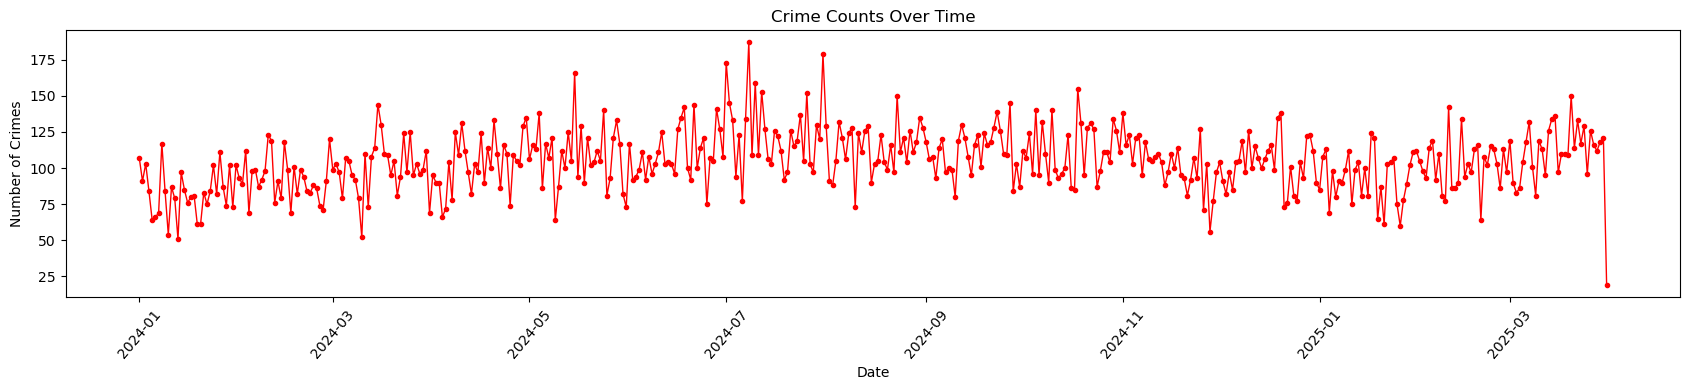

In [75]:
import pandas as pd
import matplotlib.pyplot as plt

# Load the dataset
crime = pd.read_csv('pghcrime2024.csv', dtype={17: str})  # Ensure column 17 is read as string (if necessary)


crime['ReportedDate'] = pd.to_datetime(crime['ReportedDate'])# Convert the 'ReportedDate' column to datetime


crime['Date'] = crime['ReportedDate'].dt.date # Extract the date part from 'ReportedDate' (removes time information)

crime_counts_by_date = crime.groupby('Date').size() # Group by 'Date' and count the number of occurrences of each crime


sorted_crimes_by_date = sorted(crime_counts_by_date.items(), key=lambda x: x[0]) # Sort the counts by date (this is usually handled automatically in groupby)

# Split the sorted list into two lists: dates and crime counts
dates, counts = zip(*sorted_crimes_by_date)

# Creating Line Plot
plt.figure(figsize=(17, 4)) #Just visibility
plt.plot(dates, counts, color='red', marker='o', linestyle='-', linewidth=1, markersize=3)  # Thinner line and smaller dots

#Label Info
plt.xlabel('Date')
plt.ylabel('Number of Crimes')
plt.title('Crime Counts Over Time')


plt.xticks(rotation=50)

# Show the plot
plt.tight_layout()  # Adjust layout to make sure labels fit
plt.show()


In [76]:
#now lets look at the neighborhoods with the least crime and analyze what types of crime (keep in mind we have not talked about per capita yet)

In [6]:
import pandas as pd
import geopandas as gpd
import folium
import numpy as np
from folium.plugins import HeatMap

#loading csv
crime = pd.read_csv('pghcrime2024.csv', dtype={17: str})
crime = crime[crime['Neighborhood'].notna()]
crime['Neighborhood'] = crime['Neighborhood'].str.strip().str.title()

crime_counts = crime['Neighborhood'].value_counts().reset_index() #crimes per neighborhood
crime_counts.columns = ['Neighborhood', 'CrimeCount']

# laoding GeoJSON
gdf = gpd.read_file('Neighborhoods_.geojson')

#TypeError: Object of type Timestamp is not JSON serializable
if 'created_date' in gdf.columns:
    gdf['created_date'] = gdf['created_date'].astype(str)
    
if 'last_edited_date' in gdf.columns:
    gdf['last_edited_date'] = gdf['last_edited_date'].astype(str)

gdf['Neighborhood'] = gdf['hood'].str.strip().str.title() #merging the neighborhood colum and hood column together 

# Merge crime counts into the GeoDataFrame
gdf = gdf.merge(crime_counts, on='Neighborhood', how='left')
gdf['CrimeCount'] = gdf['CrimeCount'].fillna(0).astype(int)

# population values 
population_data = {
    'Brookline': 12956,
    'Manchester': 2031,
    'Point Breeze North': 2036,
    'South Side Flats': 7467,
    'North Shore': 261,
    'Greenfield': 8032,
    'Homewood North': 3500,
    'South Side Slopes': 4122,
    'Central Business District': 5477,
    'East Liberty': 6187,
    'North Oakland': 9017,
    'Squirrel Hill South': 14208,
    'Squirrel Hill North': 11907,
    'East Allegheny': 1419,
    'Strip District': 1845,
    'Lincoln–Lemington–Belmar': 4000,
    'Shadyside': 14174,
    'Carrick': 10678,
    'Point Breeze': 8100,
    'Morningside': 4200,
    'Allentown': 2400,
    'Crafton Heights': 4000,
    'Mount Washington': 8239,
    'Crawford-Roberts': 3000,
    'Marshall-Shadeland': 3500,
    'Central Oakland': 11000,
    'Elliott': 5000,
    'Brighton Heights': 5300,
    'Central Lawrenceville': 5500,
    'Summer Hill': 2900,
    'South Oakland': 3329,
    'Homewood South': 5300,
    'Knoxville': 3300,
    'Terrace Village': 2200,
    'West Oakland': 4900,
    'Fineview': 2700,
    'Upper Lawrenceville': 3800,
    'Sheraden': 5100,
    'Spring Hill–City View': 3800,
    'Bloomfield': 8665,
    'Beechview': 12000,
    'Perry South': 5700,
    'Garfield': 7000,
    'Banksville': 5000,
    'Bluff': 4500,
    'Bon Air': 2200,
    'Northview Heights': 1769,
    'Overbrook': 4100,
    'Larimer': 4400,
    'Hazelwood': 4400,
    'Friendship': 5600,
    'Central Northside': 5200,
    'Homewood West': 5300,
    'Lower Lawrenceville': 6000,
    'East Carnegie': 2200,
    'Bedford Dwellings': 1800,
    'Lincoln-Lemington-Belmar': 4000,
    'New Homestead': 2200,
    'Troy Hill': 3000,
    'Highland Park': 6345,
    'Lincoln Place': 2700,
    'Chateau': 2200,
    'Polish Hill': 4500,
    'Glen Hazel': 576,
    'Hays': 3100,
    'California-Kirkbride': 3500,
    'East Hills': 4100,
    'Middle Hill': 3900,
    'Regent Square': 5200,
    'Perry North': 3300,
    'Stanton Heights': 5300,
    'West End': 4500,
    'Arlington Heights': 3600,
    'Arlington': 4000,
    'Beltzhoover': 3900,
    'Spring Garden': 4200,
    'Westwood': 4100,
    'Upper Hill': 3388,
    'Allegheny Center': 1419,
    'Allegheny West': 4500,
    'Windgap': 2200,
    'Duquesne Heights': 3200,
    'Mount Oliver': 5100,
    'Esplen': 2200,
    'Ridgemont': 2200,
    'Southshore': 4000,
    'Fairywood': 3000,
    'Saint Clair': 3100,
    'Swisshelm Park': 3400,
    'Chartiers': 4100,
    'Oakwood': 3400
}

#puts the ppopilation data on popup
gdf['Population'] = gdf['Neighborhood'].map(population_data)
gdf['Population'] = gdf['Population'].fillna(0).astype(int)

# crimes per 1000 on popup
gdf['CrimesPer1000'] = (gdf['CrimeCount'] / gdf['Population']) * 1000
gdf['CrimesPer1000'] = gdf['CrimesPer1000'].replace([np.inf, -np.inf], 0).fillna(0).round(2)

#just mkes it so its easier to tell what crimes are more frequent per capita 
q1 = gdf['CrimesPer1000'].quantile(0.25)
q2 = gdf['CrimesPer1000'].quantile(0.50)
q3 = gdf['CrimesPer1000'].quantile(0.75)

# categroize based dof the q1,q2,q3
def categorize_crime_rate(crimes_per_1000):
    if crimes_per_1000 <= q1:
        return 'Low Crime Rate'
    elif q1 < crimes_per_1000 <= q2:
        return 'Moderate Crime Rate'
    elif q2 < crimes_per_1000 <= q3:
        return 'High Crime Rate'
    else:
        return 'Very High Crime Rate'

gdf['CrimeRateCategory'] = gdf['CrimesPer1000'].apply(categorize_crime_rate)

#centers on pittsburgh coordnates and zooms in enough to see entire 
m = folium.Map(location=[40.4406, -79.9959], zoom_start=12)

# Add neighborhood boundaries (GeoJSON layer) with color based on crime rate
folium.GeoJson(
    gdf,
    style_function=lambda x: {
        'fillColor': 'green' if x['properties']['CrimesPer1000'] <= q1 else
                       ('yellow' if x['properties']['CrimesPer1000'] <= q2 else
                        ('orange' if x['properties']['CrimesPer1000'] <= q3 else 'red')),
        'color': 'black',
        'weight': 1,
        'fillOpacity': 0.6
    },
    # Add interactive popups with neighborhood data (including population)
    tooltip=folium.GeoJsonTooltip(
        fields=['Neighborhood', 'CrimeCount', 'CrimesPer1000', 'Population', 'CrimeRateCategory'],
        aliases=['Neighborhood:', 'Crime Count:', 'Crimes per 1,000:', 'Population:', 'Crime Rate Category:'],
        localize=True
    )
).add_to(m)

# Show map
m


In [5]:
import matplotlib.pyplot as plt
import pandas as pd
from collections import Counter

# Load the dataset
crime = pd.read_csv('pghcrime2024.csv', dtype={17: str})

# Remove rows where 'NIBRS_Offense_Type' is NaN
crime = crime[crime['NIBRS_Offense_Type'].notna()]
crimetype = set(crime['NIBRS_Offense_Type'].tolist())
print(crimetype)


#these are the crimes being measured 

{'All Other Larceny', 'Assisting or Promoting Prostitution', 'Trespass of Real Property', 'Driving Under the Influence', 'Extortion/Blackmail', 'Prostitution', 'Disorderly Conduct', 'Commercial Sex Acts', 'Sexual Assault With An Object', 'Involuntary Servitude', 'Credit Card/ATM Fraud', 'Theft from Coin-operated Machine or Device', 'Not NIBRS Reportable', 'Bribery', 'Theft from Building', 'Purse-snatching', 'Burglary/Breaking & Entering', 'Pornography/Obscene Material', 'Aggravated Assault', 'Peeping Tom', 'Counterfeiting/Forgery', 'Hacking/Computer Invasion', 'Curfew/Loiting/Vagrancy Violations', 'Drug Equipment Violations', 'Intimidation', 'All other Offenses', 'Impersonation', 'Drunkenness', 'Theft of Motor Vehicle Parts or Accessories', 'Forcible Sodomy', 'Robbery', 'Simple Assault', 'Liquor Law Violaitons', 'False Pretenses/Swindle/Confidence Game', 'Kidnapping/Abduction', 'Negligent Manslaughter', 'Bad Checks', 'Pocket-Picking', 'Shoplifting', 'Stolen Property Offenses', 'Weapon 

Below is the exact same thing but with a violent crime filter 

In [9]:
import pandas as pd
import geopandas as gpd
import folium
import numpy as np
from folium.plugins import HeatMap

#reading csv 
crime = pd.read_csv('pghcrime2024.csv', dtype={17: str}) #loading csv
crime = crime[crime['Neighborhood'].notna()]
crime['Neighborhood'] = crime['Neighborhood'].str.strip().str.title()


crime = crime[crime['NIBRS_Offense_Type'].notna()] #this is a list of just the violent crimes 
violent_crimes = {
    'Murder & Nonnegligent Manslaughter',
    'Negligent Manslaughter',
    'Kidnapping/Abduction',
    'Forcible Rape',
    'Forcible Sodomy',
    'Sexual Assault With An Object',
    'Forcible Fondling',
    'Aggravated Assault',
    'Simple Assault',
    'Robbery',
    'Intimidation'
}
crime = crime[crime['NIBRS_Offense_Type'].isin(violent_crimes)]

# Count violent crimes per neighborhood
violent_counts = crime['Neighborhood'].value_counts().reset_index()
violent_counts.columns = ['Neighborhood', 'ViolentCrimeCount']

# loading the gjson like before 
gdf = gpd.read_file('Neighborhoods_.geojson')

if 'created_date' in gdf.columns:
    gdf['created_date'] = gdf['created_date'].astype(str)
if 'last_edited_date' in gdf.columns:
    gdf['last_edited_date'] = gdf['last_edited_date'].astype(str)

gdf['Neighborhood'] = gdf['hood'].str.strip().str.title()

# Merge violent crime counts
gdf = gdf.merge(violent_counts, on='Neighborhood', how='left')
gdf['ViolentCrimeCount'] = gdf['ViolentCrimeCount'].fillna(0).astype(int)


population_data = {
    'Brookline': 12956, 'Manchester': 2031, 'Point Breeze North': 2036,
    'South Side Flats': 7467, 'North Shore': 261, 'Greenfield': 8032,
    'Homewood North': 3500, 'South Side Slopes': 4122,
    'Central Business District': 5477, 'East Liberty': 6187,
    'North Oakland': 9017, 'Squirrel Hill South': 14208,
    'Squirrel Hill North': 11907, 'East Allegheny': 1419,
    'Strip District': 1845, 'Lincoln–Lemington–Belmar': 4000,
    'Shadyside': 14174, 'Carrick': 10678, 'Point Breeze': 8100,
    'Morningside': 4200, 'Allentown': 2400, 'Crafton Heights': 4000,
    'Mount Washington': 8239, 'Crawford-Roberts': 3000,
    'Marshall-Shadeland': 3500, 'Central Oakland': 11000,
    'Elliott': 5000, 'Brighton Heights': 5300,
    'Central Lawrenceville': 5500, 'Summer Hill': 2900,
    'South Oakland': 3329, 'Homewood South': 5300, 'Knoxville': 3300,
    'Terrace Village': 2200, 'West Oakland': 4900, 'Fineview': 2700,
    'Upper Lawrenceville': 3800, 'Sheraden': 5100,
    'Spring Hill–City View': 3800, 'Bloomfield': 8665,
    'Beechview': 12000, 'Perry South': 5700, 'Garfield': 7000,
    'Banksville': 5000, 'Bluff': 4500, 'Bon Air': 2200,
    'Northview Heights': 1769, 'Overbrook': 4100, 'Larimer': 4400,
    'Hazelwood': 4400, 'Friendship': 5600, 'Central Northside': 5200,
    'Homewood West': 5300, 'Lower Lawrenceville': 6000,
    'East Carnegie': 2200, 'Bedford Dwellings': 1800,
    'Lincoln-Lemington-Belmar': 4000, 'New Homestead': 2200,
    'Troy Hill': 3000, 'Highland Park': 6345, 'Lincoln Place': 2700,
    'Chateau': 2200, 'Polish Hill': 4500, 'Glen Hazel': 576,
    'Hays': 3100, 'California-Kirkbride': 3500, 'East Hills': 4100,
    'Middle Hill': 3900, 'Regent Square': 5200, 'Perry North': 3300,
    'Stanton Heights': 5300, 'West End': 4500,
    'Arlington Heights': 3600, 'Arlington': 4000, 'Beltzhoover': 3900,
    'Spring Garden': 4200, 'Westwood': 4100, 'Upper Hill': 3388,
    'Allegheny Center': 1419, 'Allegheny West': 4500, 'Windgap': 2200,
    'Duquesne Heights': 3200, 'Mount Oliver': 5100, 'Esplen': 2200,
    'Ridgemont': 2200, 'Southshore': 4000, 'Fairywood': 3000,
    'Saint Clair': 3100, 'Swisshelm Park': 3400, 'Chartiers': 4100,
    'Oakwood': 3400
}

gdf['Population'] = gdf['Neighborhood'].map(population_data)
gdf['Population'] = gdf['Population'].fillna(0).astype(int)

gdf['ViolentCrimesPer1000'] = (gdf['ViolentCrimeCount'] / gdf['Population']) * 1000
gdf['ViolentCrimesPer1000'] = gdf['ViolentCrimesPer1000'].replace([np.inf, -np.inf], 0).fillna(0).round(2)

q1 = gdf['ViolentCrimesPer1000'].quantile(0.25)
q2 = gdf['ViolentCrimesPer1000'].quantile(0.50)
q3 = gdf['ViolentCrimesPer1000'].quantile(0.75)

def categorize(crime_rate):
    if crime_rate <= q1:
        return 'Low Crime Rate'
    elif crime_rate <= q2:
        return 'Moderate Crime Rate'
    elif crime_rate <= q3:
        return 'High Crime Rate'
    else:
        return 'Very High Crime Rate'

gdf['ViolentCrimeRateCategory'] = gdf['ViolentCrimesPer1000'].apply(categorize)

m = folium.Map(location=[40.4406, -79.9959], zoom_start=12)

folium.GeoJson(
    gdf,
    style_function=lambda x: {
        'fillColor': 'green' if x['properties']['ViolentCrimesPer1000'] <= q1 else
                     ('yellow' if x['properties']['ViolentCrimesPer1000'] <= q2 else
                      ('orange' if x['properties']['ViolentCrimesPer1000'] <= q3 else 'red')),
        'color': 'black',
        'weight': 1,
        'fillOpacity': 0.6
    },
    tooltip=folium.GeoJsonTooltip(
        fields=['Neighborhood', 'ViolentCrimeCount', 'ViolentCrimesPer1000', 'Population', 'ViolentCrimeRateCategory'],
        aliases=['Neighborhood:', 'Violent Crime Count:', 'Violent Crimes per 1,000:', 'Population:', 'Crime Rate Category:'],
        localize=True
    )
).add_to(m)

if not crime.empty and {'X', 'Y'}.issubset(crime.columns):
    heat_data = [[row['Y'], row['X']] for _, row in crime.iterrows()]
    HeatMap(heat_data, min_opacity=0.2, radius=30, blur=25).add_to(m)

m


Based off this map I can Pick 3 neighborhoods that stand out the most to me 

1.) *Squirrel Hill North* : **2.44 Violent Crimes per 1,000 People**

2.) *Lower Lawernceville* : **4.17 Violent Crimes per 1,000 People**

3.) *Point Breeze* : **2.96 Violent Crimes per 1,000 people**


I now want to disect the partiuclar crimes that occur to get a better understanding on who may be the clear winner here in **Safest** neighborhood in Pittsburgh 

/scratch/slurm-12904/ipykernel_58565/2443955406.py:25: UserWarning: Tight layout not applied. The bottom and top margins cannot be made large enough to accommodate all axes decorations.
  plt.tight_layout()


<Figure size 1000x600 with 0 Axes>

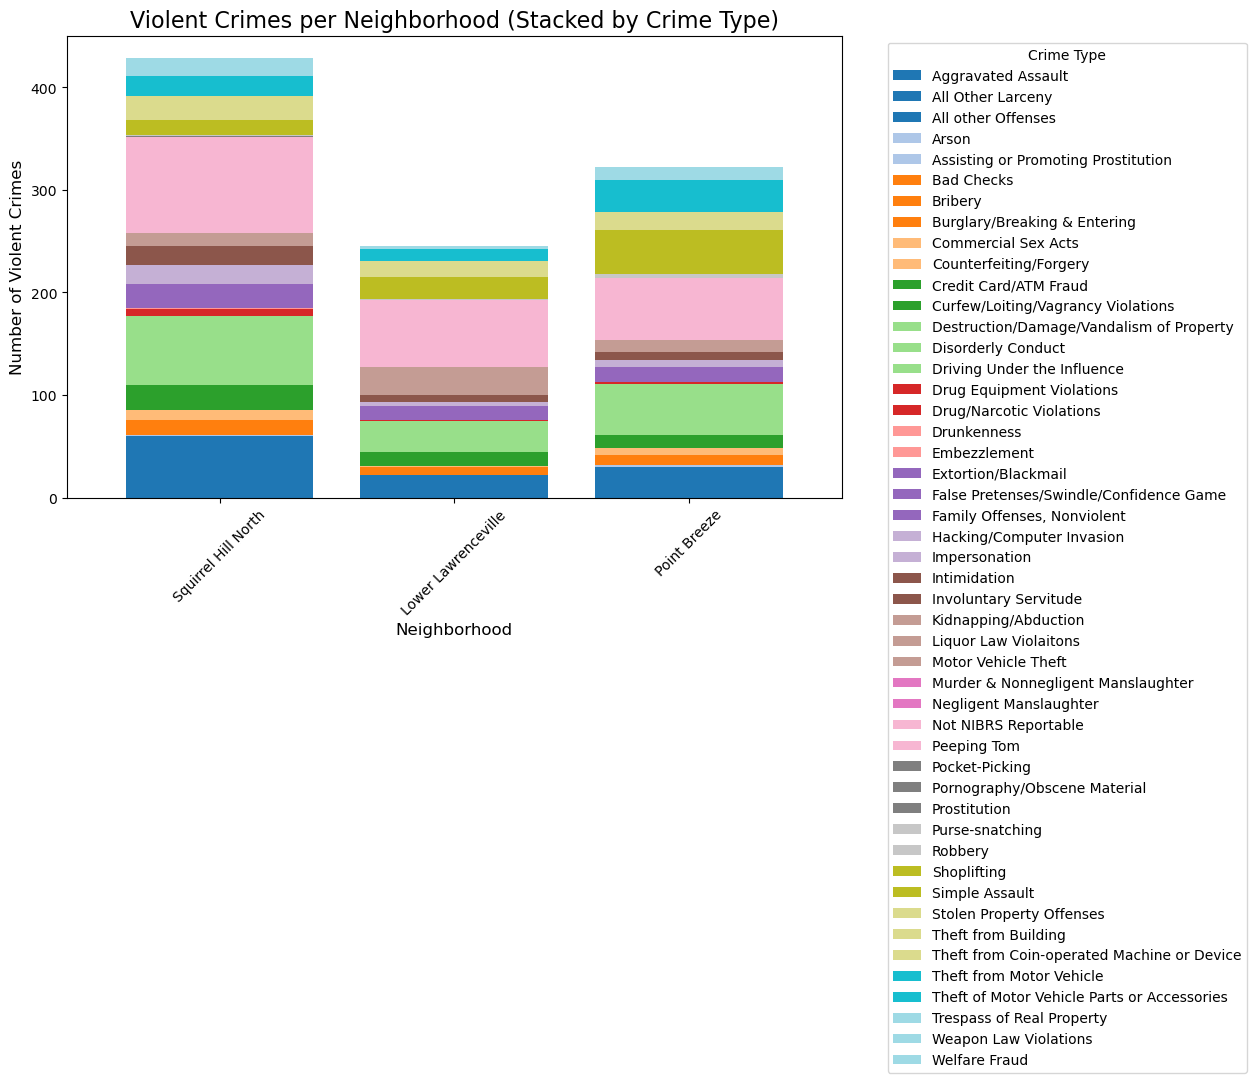

In [7]:
import matplotlib.pyplot as plt
import seaborn as sns

violent_crime_types = crime.groupby(['Neighborhood', 'NIBRS_Offense_Type']).size().unstack(fill_value=0)

neighborhoods_of_interest = ['Squirrel Hill North', 'Lower Lawrenceville', 'Point Breeze']
violent_crime_types = violent_crime_types.loc[neighborhoods_of_interest]

plt.figure(figsize=(10, 6))

violent_crime_types.plot(kind='bar', stacked=True, figsize=(10, 6), colormap='tab20', width=0.8)

plt.title('Violent Crimes per Neighborhood (Stacked by Crime Type)', fontsize=16)
plt.xlabel('Neighborhood', fontsize=12)
plt.ylabel('Number of Violent Crimes', fontsize=12)
plt.xticks(rotation=45)
plt.legend(title='Crime Type', bbox_to_anchor=(1.05, 1), loc='upper left')

plt.tight_layout()
plt.show()


<Figure size 1000x600 with 0 Axes>

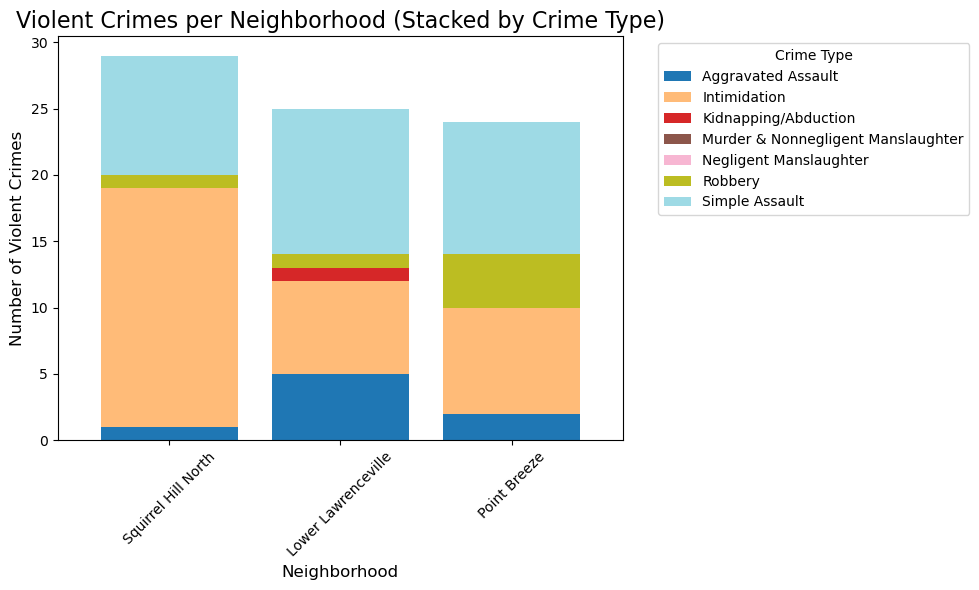

In [8]:
import matplotlib.pyplot as plt
import seaborn as sns


#Violent Crime Filter 
violent_crimes = {
    'Murder & Nonnegligent Manslaughter',
    'Negligent Manslaughter',
    'Kidnapping/Abduction',
    'Forcible Rape',
    'Forcible Sodomy',
    'Sexual Assault With An Object',
    'Forcible Fondling',
    'Aggravated Assault',
    'Simple Assault',
    'Robbery',
    'Intimidation'
}

crime = crime[crime['NIBRS_Offense_Type'].isin(violent_crimes)]

violent_crime_types = crime.groupby(['Neighborhood', 'NIBRS_Offense_Type']).size().unstack(fill_value=0)

neighborhoods_of_interest = ['Squirrel Hill North', 'Lower Lawrenceville', 'Point Breeze']
violent_crime_types = violent_crime_types.loc[neighborhoods_of_interest]

plt.figure(figsize=(10, 6))

violent_crime_types.plot(kind='bar', stacked=True, figsize=(10, 6), colormap='tab20', width=0.8)

plt.title('Violent Crimes per Neighborhood (Stacked by Crime Type)', fontsize=16)
plt.xlabel('Neighborhood', fontsize=12)
plt.ylabel('Number of Violent Crimes', fontsize=12)
plt.xticks(rotation=45)
plt.legend(title='Crime Type', bbox_to_anchor=(1.05, 1), loc='upper left')

plt.tight_layout()
plt.show()


But to remind you the population for each are 

Squirrel Hill North: **11,907** : 2.44 Violent Crimes per 1,000 People

Lower Lawernceville: **6,000** : 4.17 Violent Crimes per 1,000 People

Point Breeze: **8,100** : 2.96 Violent Crimes per 1,000 people



So our very obvious winner for **SAFEST** neighborhood in Pittsburgh goes to

![My GIF](https://media.giphy.com/media/v1.Y2lkPTc5MGI3NjExNGVlMWVja3dhazJhcjY4ZDQzZnM1NmtkcThueno0OTN2cTBnOHNuZCZlcD12MV9naWZzX3NlYXJjaCZjdD1n/FP56vNcwOVyvu/giphy.gif)

**Squirrel Hill North**

